# 5. Review of Weeks 1-4

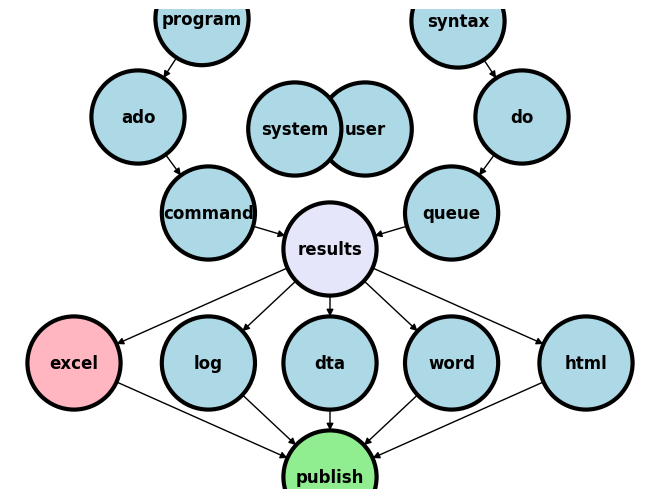

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()
G.add_node("user", pos=(550, 500))
G.add_node("system", pos=(-550, 500))
G.add_node("program", pos=(-2000, 960))
G.add_node("syntax", pos=(2000, 950))
G.add_node("ado", pos=(-3000, 550))
G.add_node("do", pos=(3000, 550))
G.add_node("command", pos=(-1900, 150))
G.add_node("queue", pos=(1900, 150))
G.add_node("results", pos=(0, 0))
G.add_node("dta", pos=(0, -475))
G.add_node("log", pos=(-1900, -475))
G.add_node("excel", pos=(-4000, -475))
G.add_node("word", pos=(1900, -475))
G.add_node("html", pos=(4000, -475))
G.add_node("publish", pos=(0, -950))
G.add_edges_from([("program", "ado"), ("syntax", "do")])
G.add_edges_from([("ado", "command"), ("do", "queue")])
G.add_edges_from([("command", "results"), ("queue", "results"), ("results", "excel"), ("results", "word"), ("results", "html")])
G.add_edges_from([("results", "dta"), ("results", "log")])
G.add_edges_from([("dta", "publish"), ("log", "publish"), ("excel", "publish"), ("word", "publish"), ("html", "publish")])

pos = nx.get_node_attributes(G, 'pos')
node_colors = ["lightblue" if node not in ["results", "excel", "publish"] else "lightpink" if node == "excel" else "lavender" if node == "results" else "lightgreen" for node in G.nodes()]

nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=4500, node_color=node_colors, linewidths=3)
ax = plt.gca()
ax.collections[0].set_edgecolor("#000000")  # Set edge color to black for better contrast
ax.set_xlim([-5000, 5000])
ax.set_ylim([-1000, 1000])
plt.show()



## 5.0 Stata Programming
### 5.0.1 Basic
- Installation of Stata BE/SE/MP
- Stata modes:
   - Interactive
      - Use of `.do` files or Stata results window (Basic & Intermediate classes)
   - Batch mode
      - Run a `.sh` bash script from a command line (Terminal, Visual Studio Code, etc)
```bash
# advanced workflow, can run in background, even for hours, days, weeks, and months
export PATH=$PATH:/applications/stata/statamp.app/contents/macos/
stata-mp -b hw3.do #.log file and output automatically generated by your machine
```
- Outputting results (string, numeric)
   - `.xlsx`
   - `.log`
   - `.docx`
   - `.dta`
   - `.html`
- [Syntax](https://jhustata.github.io/basic/chapter3.html#miscellany)
   - We now have a catalog of Stata commands and syntax
   - It will be updated throughout the second half of the term
   - Please reference it during your labs and homeworks
- Third-party Programs
   - `which` command
### 5.0.2 Intermediate
- Remote `.do`, `.ado`, `.csv`, etc. file management and **version control**
- GitHub repo vs. local installation of Third-party programs (`.ado`)
- Creating websites (`.html`)
- Open science (sharing URLs with collaborators)
### 5.0.3 Advanced
- Use of a command line (e.g. Terminal, Visual Studio Code)
- Running Stata in batch mode
   - Ability to run Python and R in batch mode
- Private vs. Public repos
- Security, Privacy, Confidentiality, and HIPAA Compliance
## 5.1 Macros
- System
   - `creturn list`
   - `ereturn list`
   - `return list`
- Local
   - `local`
   - `global`
## 5.3 Loops
   - `foreach`
   - `forvalues`
## 5.4 File Management
   - `postfile`
   - `export excel`
   - `merge`
   - `syntax varlist [if], [optional] mandatory`



Visualizing data

```stata
capture log close _all
log using creturn_list.log, replace 
creturn list
log close  
```

[creturn_list.log](https://raw.githubusercontent.com/jhustata/livre/main/creturn_list.log)

When you search the above output for `scheme` you'll find the follow:

```stata

Graphics settings

    ----------------------------------------------------------------------------------------------------
            c(graphics) = "on"                       (set graphics)
              c(scheme) = "stcolor"                  (set scheme)
          c(printcolor) = "asis"                     (set printcolor)
           c(copycolor) = "asis"                     (set copycolor)
       c(maxbezierpath) = 0                          (set maxbezierpath)
       c(min_graphsize) = 1                          (region_options)
       c(max_graphsize) = 100                        (region_options)
    ----------------------------------------------------------------------------------------------------
```

My machine has `c(version) == 18` and the default is `stcolor`. The world-renowned, *sui generis*,  Stata `s2color` has finally been abandoned

But if I wish to reproduce that classic Stata graphical output I might change my color scheme:

```stata
webuse lifeexp, clear
hist lexp
```

```stata
webuse lifeexp, clear
hist lexp
graph export lexp_stcolor.png, replace 
```

![](lexp_stcolor.png)

That's my default. So lets see what it looks like on virtually all versions of Stata before 18:

```stata
. webuse lifeexp, clear
(Life expectancy, 1998)

. di c(scheme)
stcolor

. hist lexp, scheme(s2color)
(bin=8, start=54, width=3.125)

. di c(scheme)
stcolor

. graph export lexp_s2color.png, replace 
file /Users/d/Dropbox (Personal)/1f.ἡἔρις,κ/1.ontology/summer/lexp_s2color.png	saved	as	PNG	format

. 

```

![](lexp_s2color.png)

I think the above output clarifies what the `c` in `c(scheme)` refers to: a constant default, even when I change the output parameter.

So lets reset my default:

```stata
set scheme s2color
webuse lifeexp
di c(scheme)
hist lexp
graph export lexp_setscheme.png, replace
```

```stata
. set scheme s2color

. webuse lifeexp
(Life expectancy, 1998)

. di c(scheme)
s2color

. hist lexp
(bin=8, start=54, width=3.125)

. graph export lexp_setscheme.png, replace
file /Users/d/Dropbox (Personal)/1f.ἡἔρις,κ/1.ontology/summer/lexp_setscheme.png	saved	as	PNG
format

. 

```

![](lexp_setscheme.png)

How may one restore the default `c(scheme)`?

![](set_scheme_default.png)

So lets see if that works:

```stata
set scheme default
di c(N)
```

```stata
. set scheme default
scheme default not found
r(111);


```

That did not work. And after a Google search (chatGPT hasn't yet been trained on data from a post Stata18 world!), I found nothing.

So I'll just invoke my prior knowledge:

```stata
set scheme stcolor
di c(scheme)
```

```stata
. set scheme stcolor

. di c(scheme)
stcolor

. 

```

## 5.1  histogram

Univariable: distribution

```stata
use transplants, clear
hist bmi
graph export bmi.png, replace 
```

```stata

. use transplants, clear

. hist bmi
(bin=32, start=17, width=.71875)

. graph export bmi.png, replace 
file /Users/d/Dropbox (Personal)/1f.ἡἔρις,κ/1.ontology/summer/bmi.png	saved	as	PNG	format

. 


```

![](bmi.png)

+ 32 bars
+ First bar is BMI 17-17.71875
+ Each one represents 0.71875 BMI units

## 5.1.1 density

```stata
hist bmi, width(2)
graph export bmi2.png, replace
```

```stata
. hist bmi, width(2)
(bin=12, start=17, width=2)

. graph export bmi2.png, replace
file /Users/d/Dropbox (Personal)/1f.ἡἔρις,κ/1.ontology/summer/bmi2.png	saved	as	PNG	format

. 

```

![](bmi2.png)

+ 12 bars
+ First bar is BMI 17-19
+ Each on repesents 2 BMI units

```stata
hist bmi, bin(500) start(0) 
graph export bmi_bin500.png, replace
```

```stata
. hist bmi, bin(500) start(0) 
(bin=500, start=0, width=.08)

. graph export bmi_bin500.png, replace
file /Users/d/Dropbox (Personal)/1f.ἡἔρις,κ/1.ontology/summer/bmi_bin500.png	saved	as	PNG	format

. 

```

![](bmi_bin500.png)

```stata
hist bmi, width(2) start(0)
graph export bmi3.png, replace
```

```stata
. hist bmi, width(2) start(0)
(bin=20, start=0, width=2)

. graph export bmi3.png, replace
file /Users/d/Dropbox (Personal)/1f.ἡἔρις,κ/1.ontology/summer/bmi3.png	saved	as	PNG	format

. 

```

+ 20 bars
+ First bar is BMI 0-2
+ Each one represents 2 units

![](bmi3.png)

```stata
use transplants, clear
hist bmi, bin(10)
graph export bmi_bin10.png, replace 
```

```stata
. use transplants, clear

. hist bmi, bin(10)
(bin=10, start=17, width=2.3)

. graph export bmi_bin10.png, replace 
file /Users/d/Dropbox (Personal)/1f.ἡἔρις,κ/1.ontology/summer/bmi_bin10.png	saved	as	PNG	format

. 
end of do-file

. 

```

![](bmi_bin10.png)

+ 10 bars





Four flavors of the `histogram` command:

+ density (default)
+ fraction
+ percent
+ frequency

```stata
use transplants, clear
hist age, addplot(kdensity age)
graph export hist_kdensity.png, replace
```

```stata
. use transplants, clear

. hist age, addplot(kdensity age)
(bin=33, start=0, width=2.5757576)

. graph export hist_kdensity.png, replace
file /Users/d/Dropbox (Personal)/1f.ἡἔρις,κ/1.ontology/summer/hist_kdensity.png	saved	as	PNG	format

. 

```

![](hist_kdensity.png)

## 5.1.2 fraction

```stata
hist rec_wgt_kkg, fraction
```

```stata
. hist rec_wgt_kg, fraction
(bin=32, start=9.67, width=4.5596875)

. graph export weight.png, replace 
file /Users/d/Dropbox (Personal)/1f.ἡἔρις,κ/1.ontology/summer/weight.png	saved	as	PNG	format

. 

```

![](weight.png)

## 5.1.3 percent

```stata
hist rec_wgt_kg, percent
graph export weight2.png, replace 
```

```stata

. hist rec_wgt_kg, percent
(bin=32, start=9.67, width=4.5596875)

. graph export weight2.png, replace 
file /Users/d/Dropbox (Personal)/1f.ἡἔρις,κ/1.ontology/summer/weight2.png	saved	as	PNG	format

. 

```

![](weight2.png)

## 5.1.4 frequency

```stata
hist rec_wgt_kg, freq
graph export weight3.png, replace 
```

```stata
. hist rec_wgt_kg, freq
(bin=32, start=9.67, width=4.5596875)

. graph export weight3.png, replace 
file /Users/d/Dropbox (Personal)/1f.ἡἔρις,κ/1.ontology/summer/weight3.png	saved	as	PNG	format

. 
end 

```

![](weight3.png)

## 5.1.5 discrete

```stata
hist dx 
graph export discrete.png, replace 
```

```stata
. hist dx 
(bin=33, start=1, width=.24242424)

. graph export discrete.png, replace 
file /Users/d/Dropbox (Personal)/1f.ἡἔρις,κ/1.ontology/summer/discrete.png	saved	as	PNG	format


```

![](discrete.png)

+ 0.242424 diagnoses?
+ meaningless
+ option to adapt output to discrete variable 

```stata
hist dx, disc
graph export discrete2.png, replace 
```

```stata

. hist dx, disc
(start=1, width=1)

. graph export discrete2.png, replace 
file /Users/d/Dropbox (Personal)/1f.ἡἔρις,κ/1.ontology/summer/discrete2.png	saved	as	PNG	format

. 
end

```

![](discrete2.png)

## 5.1.6 addplot

```stata
hist height if gender==0, addplot(hist height if gender ==1)
graph export addplot.png, replace 
```

![](addplot.png)

```stata
hist rec_hgt_cm if gender==0, fcolor(midblue%50) ///
    addplot(hist rec_hgt_cm if gender ==1, fcolor(orange%40))
graph export addplot2.png, replace 
```

![](addplot2.png)

```stata
hist rec_hgt_cm if gender==0, ///
    fcolor(midblue%50) ///
    legend( ///
	    lab(1 "Male") ///
		lab(2 "Female")) ///
    addplot(hist rec_hgt_cm if gender ==1, fcolor(orange%40))
graph export addplot3.png, replace 
```

![](addplot3.png)

## 5.1.7 scheme

```stata
hist rec_hgt_cm, scheme(s2color)
graph export scheme.png, replace 
```

![](scheme.png)

## 5.1.8 normal

```stata
hist rec_hgt_cm, normal
graph export overlay.png, replace 
```

![](overlay.png)

## 5.2 twoway

Bivariable: correlation

## 5.2.1 scatter

```stata
use donors, clear
graph twoway scatter don_wgt don_hgt
graph export twowway.png, replace 
```

```stata
. use donors, clear

. graph twoway scatter don_wgt don_hgt

. graph export twowway.png, replace 
file /Users/d/Dropbox (Personal)/1f.ἡἔρις,κ/1.ontology/summer/twowway.png	saved	as	PNG	format

. 

```

![](twowway.png)

The `twoway` plot may be a simple descriptive visualization of data. But what is implied during this exploratory phase of analysis is the following regression:     

$Y   = \beta_0    +    \beta_1 X_1 +    \beta_2 X_2   +   \cdots   +   \beta_N X_N   \pm   \varepsilon_i  $

So if you don't have any predictor, then you're left with just $Y   =    \beta_0  \pm    \varepsilon$, which includes all one-way plots such as histogram, boxplot, or a twoway plot of that one variable against a "meaningless" x-axis:



```stata
use transplants, clear
g x=1
qui sum age
return list
g b0=r(mean)
g ub=r(mean)+r(sd)*1.96
g lb=r(mean)-r(sd)*1.96
twoway (scatter age x, ///
           jitter(5) ///
	       xscale(off) ///
		   mcolor(lime%5) ///
	   ) ///
       (scatter b0 x, ///
	       msize(2) ///
		   mcolor(midblue%80) ///
		) ///
		(rcap ub lb x, ///
		   legend(off) ///
		   lc(orange%80) ///
		   yti("Age at Transplant, y", orientation(horizontal)) ///
		   note("Mean & 95%CI", size(3)) ///
		)
graph export age_m_95ci.png, replace
```

![](age_m_95ci.png)

## 5.2.2 line

"ecd" = "extended criteria donor" = donor age $\gt  60$, or donor age $50-59$ with certain comorbidities

```stata
use transplants, clear
bys age: egen mean_ecd = mean(don_ecd) 
egen age_tag = tag(age)
graph twoway line mean_ecd age if age_tag==1
graph export twoway_egen.png, replace

```

![](twoway_egen.png)

How has the number of standard criteria donor (SCD) and extended criteria donor (ECD) transplants changed over time?


`SCD` = donor age < 50 or (age 50-59 and donor had at most one of: hypertension, death by cerebrovascular accident, terminal serum creatinine > 1.5 mg/dL)    
     
`ECD` = donor age >= 60 or (age 50-59 and donor had at least two of: hypertension, death by cerebrovascular accident, terminal serum creatinine > 1.5 mg/dL)     

Let's graph the number of SCD and ECD transplants over time   

```stata
use tx_yr.dta, clear
desc

```

```stata
. use tx_yr.dta, clear

. desc

Contains data from tx_yr.dta
Observations:            10		     
Variables:            13		2 Jul 2021 08:07
				
Variable      Storage   Display	Value
name         type    format	label	Variable label
				
yr              int     %8.0g		Transplant Year
not_working     double  %9.0g		Num. Unemployed Recipients
n               double  %8.0g		(sum) n
hypertensive    double  %9.0g		(sum) hypertensive
unknown_disease double  %9.0g		(sum) unknown_disease
diabetes        double  %9.0g		(sum) diabetes
ecd             double  %4.0g		(sum) ecd
female          double  %8.0g		(sum) female
rec_hcv_antib~y double  %9.0g		Number HCV+ Recipients
over70          double  %9.0g		Number Recips. Over 70 Years	Old
male            int     %8.0g		     
scd             int     %8.0g		     
total           float   %9.0g		Total Num. of Recipients
				
Sorted by: yr


```


`tx_yr.dta` has data on the frequency of specific transplant types per year. For example, the variable female is the number of female transplant recipients per year. The variable scd is the number of standard criteria donor transplants performed per year.    

```stata
graph twoway line n yr
graph export line_n_yr.png, replace 
```

![](line_n_yr.png)

```stata
graph twoway line ecd scd yr
graph export line_n_yr2.png, replace 
```

![](line_n_yr2.)

## 5.2.3 connected

```stata
graph twoway connected n yr
graph export connected.png, replace 
```

![](connected.png)

## 5.2.4 area

```stata
graph twoway area n yr
graph export area.png, replace 
```

![](area.png)

## 5.2.5 bar

```stata
graph twoway bar n yr
graph export bar.png, replace 
```

![](bar.png)



## 5.2.6 function

```stata
graph twoway function y=x^2+2
graph export function.png
```

![](function.png)

## 5.3 y

Several y variables

```stata
graph twoway area ecd scd yr
graph export nyvar.png, replace 
```

![](nyvar.png)

Change order


```stata
graph twoway area scd ecd yr
graph export nyvar2.png, replace 
```

![](nyvar2.png)


Order matters: the one listed first gets graphed first. Additional areas might overlie the first one.

```stata
graph twoway bar scd ecd yr
graph export nyvar3.png, replace
```

![](nyvar3.png)


Interpretation is tricky. In 2010, were there about 130 SCD transplants (top of red to top of blue) or 170 (x- axis to top of blue)?   

## 5.4 overlay

```stata
twoway line n yr || connected male female yr
graph export line_connect.png, replace
```

![](line_connect.png)


```stata
regress n yr
twoway line n yr ///
  || function y=_b[_cons]+_b[yr]*x, range(yr)
graph export line_regress.png, replace
```

![](line_regress.png)

```stata
twoway line female yr /// 
    || line male yr ///
    || line scd yr ///
    || line ecd yr ///
    || line n yr
graph export five_overlay.png, replace
```

![](five_overlay.png)

## 5.5 axis

The graph of # transplants per year exaggerates year- on-year change; the value for 2009 appears to be near zero, but is actually 180. How can we fix the axis?    

### 5.5.1 scale()

```stata
twoway line n yr, yscale(range(0))
graph export scale.png, replace
```

![](scale.png)

Make sure the y axis range includes the number zero

```stata
twoway line n yr, yscale(range(0 400))
graph export scale2.png, replace
```

![](scale2.png)

Make sure the y axis range includes the numbers 0 and 400

```stata
tw li n yr, xscale(range(2014))
graph export range.png, replace 
```

![](range.png)

```stata
tw li ecd yr, xscale(off) yscale(off)
graph export scale_off.png, replace 
```

![](scale_off.png)

## 5.6 program

```stata
capture program drop figure1
qui program define figure1 
	syntax varlist, title(str) xtitle(str) ylt(str)
	
	local y_axis_var: di word("`varlist'", 1)
	local x_axis_var: di word("`varlist'", 2)
	local xti: di "`xtitle'"
	local yline_text: di "`ylt'"
	
	qui sum `y_axis_var', d 
	g p50=r(p50)
	g p25=r(p25)
	g p75=r(p75)
	local m_age=r(mean)
	local m_age_text=r(mean) + 2
	
	qui sum `x_axis_var'
	local m_xaxis=r(mean)
	
	#delimit ;
	twoway (scatter p50 abo in 1/100)(rcap p25 p75 abo in 1/100,
	    ti("`title'")
		xti("`xti'")
		text(`m_age_text' `m_xaxis' "`yline_text'")
		yline(`m_age',
		    lc(lime)
		)
		yti("`y_axis_var'",
		    orientation(horizontal)
		)
		ylab(10(10)80)
		xlab(
		    1 "A"
			2 "B"
			3 "AB"
			4 "O"
		)
		legend(off
		    lab(1 "Median")
			lab(2 "1st Quartile")
			lab(3 "4th Quartile")
			order(3 1 2)
		)
		note("Median & IQR")
	)
	;
	#delimit cr
end
```


```stata
use transplants, clear 
figure1 age abo, title("Age at Transplant") xtitle("ABO Blood Group") ylt("Mean Age")
graph export figure1.png, replace 
```

![](figure1.png)

This is a modified program with `twoway rcap` to draw the interquartile range. I've also suppressed the legend since the output is modified. Hope you can notice the difference from the one in the video. But you can still find a copy of the original program below.


The original program developed together in class:

```stata
capture program drop figure1
qui program define figure1 
	syntax varlist, title(str) xtitle(str) ylt(str)
	
	local y_axis_var: di word("`varlist'", 1)
	local x_axis_var: di word("`varlist'", 2)
	local xti: di "`xtitle'"
	local yline_text: di "`ylt'"
	
	qui sum `y_axis_var', d 
	g p50=r(p50)
	g p25=r(p25)
	g p75=r(p75)
	local m_age=r(mean) + 2
	
	qui sum `m_axis_var'
	local m_xaxis=r(mean)
	
	#delimit ;
	twoway (scatter p50 abo in 1/100)(rcap p25 p75 abo in 1/100,
	    ti("`title'")
		xti("`xti'")
		text(`m_xaxis' `m_age' "`yline_text'")
		yline(`m_age',
		    lc(lime)
		)
		yti("`y_axis_var'",
		    orientation(horizontal)
		)
		ylab(10(10)80)
		xlab(
		    1 "A"
			2 "B"
			3 "AB"
			4 "O"
		)
		legend(off
		    lab(1 "Median")
			lab(2 "1st Quartile")
			lab(3 "4th Quartile")
			order(3 1 2)
		)
		note("Median & IQR")
	)
	;
	#delimit cr
end 

```